# Simulation of Inventory and Sales

Data
- Items and Inventory in May 2024
- Demand from September 2021 to May 2024

In [36]:
include("src/utils.jl")
include("src/read_data.jl")
include("src/plot_data.jl")


histo_demand (generic function with 1 method)

In [15]:
df_supply = read_supply()

Row,ITEM,CATEGORY,ORDER_DATE,ORDERED_QUANTITY,DELIVERY_DATE,DELIVERED_QTY
,String31,String1?,DateTime,String7,DateTime,String7?
1,MCD-YMBEB-BK,C,2021-12-31T18:15:00,1,2022-01-01T09:25:00,missing
2,MCD-COL19-ST-2L,C,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1
3,MCD-COLGN-BK-2L,C,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1
4,MCD-RDN19-ST-2L,C,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1
5,SNAPTRUCK,E,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1
6,MCD-DOXOU-01-WH-0M,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1
7,MCD-DOXOU-01-WH-XL,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1
8,MCD-GBLL2-BK-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1
9,MCD-RDN19-ST-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1


In [16]:
# Compute supply Ratio
transform!(df_supply, :DELIVERED_QTY => ByRow(q->ismissing(q) ? 0 : 1) => :SUPPLY_RATIO)

Row,ITEM,CATEGORY,ORDER_DATE,ORDERED_QUANTITY,DELIVERY_DATE,DELIVERED_QTY,SUPPLY_RATIO
,String31,String1?,DateTime,String7,DateTime,String7?,Int64
1,MCD-YMBEB-BK,C,2021-12-31T18:15:00,1,2022-01-01T09:25:00,missing,0
2,MCD-COL19-ST-2L,C,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1,1
3,MCD-COLGN-BK-2L,C,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1,1
4,MCD-RDN19-ST-2L,C,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1,1
5,SNAPTRUCK,E,2021-12-31T23:00:00,1,2022-01-01T09:25:00,1,1
6,MCD-DOXOU-01-WH-0M,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1
7,MCD-DOXOU-01-WH-XL,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1
8,MCD-GBLL2-BK-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1
9,MCD-RDN19-ST-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1


In [27]:
# Group by year month, and remove years before 2022
df_supply.MONTH = month.(df_supply.ORDER_DATE)
df_supply.YEAR = year.(df_supply.ORDER_DATE)
subset!(df_supply, :YEAR => ByRow(>=(2022)))
df_supply_ratio = combine(groupby(df_supply, [:MONTH, :YEAR]), :SUPPLY_RATIO => mean => :SUPPLY_RATIO, nrow => :NB_ORDERS)

Row,MONTH,YEAR,SUPPLY_RATIO,NB_ORDERS
,Int64,Int64,Float64,Int64
1,1,2022,0.640489,7029
2,1,2023,0.679183,6951
3,1,2024,0.749494,8395
4,2,2022,0.61832,7129
5,2,2023,0.646888,9320
6,2,2024,0.762196,6375
7,3,2022,0.575912,8826
8,3,2023,0.679705,8258
9,3,2024,0.762493,10606


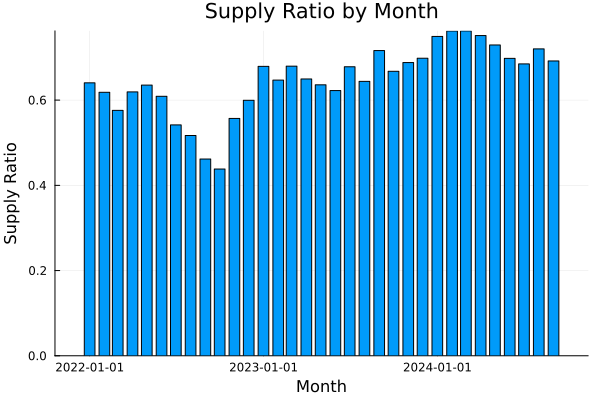

In [29]:
# Date for year month
transform!(df_supply_ratio, [:MONTH, :YEAR] => ByRow((m, y) -> Dates.Date(y, m, 1)) => :DATE)
# plot supply ratio by month
bar(df_supply_ratio.DATE, df_supply_ratio.SUPPLY_RATIO, title="Supply Ratio by Month", xlabel="Month", ylabel="Supply Ratio", legend=false)

In [30]:
# supply ratio by product
df_supply_ratio_product = combine(groupby(df_supply, [:ITEM, :CATEGORY]), :SUPPLY_RATIO => mean => :SUPPLY_RATIO, nrow => :NB_ORDERS)

Row,ITEM,CATEGORY,SUPPLY_RATIO,NB_ORDERS
,String31,String1?,Float64,Int64
1,MCD-DOXOU-01-WH-0M,D,1.0,3
2,MCD-DOXOU-01-WH-XL,D,1.0,2
3,MCD-GBLL2-BK-0M,C,1.0,8
4,MCD-RDN19-ST-0M,C,0.75,8
5,MCD-BAGPK-YW,C,1.0,75
6,MCD-COL19-BE-0L,D,1.0,12
7,MCD-COL19-BE-0M,D,1.0,11
8,MCD-COL19-BK-0L,D,1.0,10
9,MCD-COL19-BK-0M,D,1.0,8


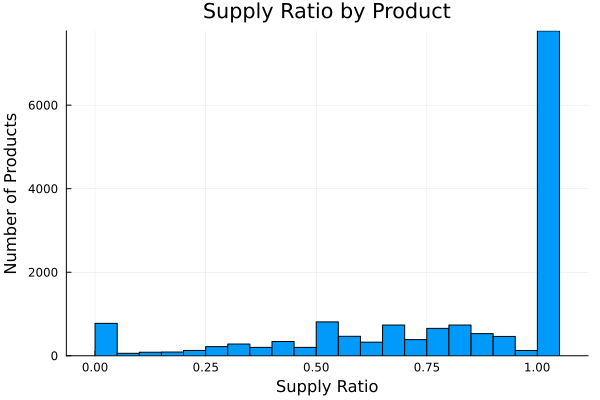

In [31]:
# histogram of supply ratio by product
histogram(df_supply_ratio_product.SUPPLY_RATIO, title="Supply Ratio by Product", xlabel="Supply Ratio", ylabel="Number of Products", legend=false)

maximum(df_supply_ratio_product_1.NB_ORDERS) = 228


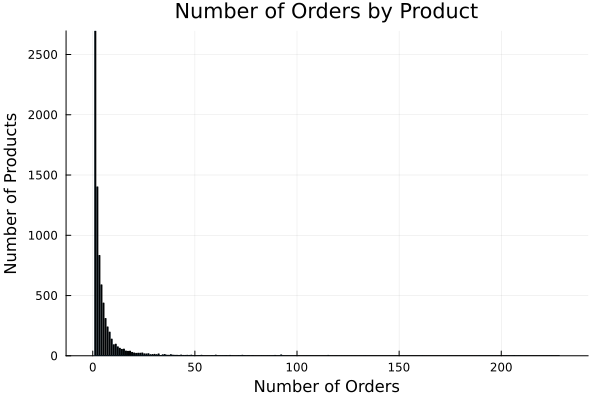

In [35]:
# select products with supply ratio  = 1
df_supply_ratio_product_1 = subset(df_supply_ratio_product, :SUPPLY_RATIO => ByRow(==(1)))
@show maximum(df_supply_ratio_product_1.NB_ORDERS)
# histogram of number of orders by product
histogram(df_supply_ratio_product_1.NB_ORDERS, title="Number of Orders by Product", xlabel="Number of Orders", ylabel="Number of Products", legend=false)

In [57]:
df_delivery = read_delivery()

Row,PURCHASE_ORDER,ITEM_CODE,ORDER_DATE,ORDER_QTY,DELIVERY_DATE,DELIVERED_QTY
,String15,String31,Date,String7?,Date?,String7?
1,P30013660,5PV-F8371-00,2021-10-26,600,2021-12-07,600
2,P30013751,90520-02818,2021-11-15,30,2021-12-10,30
3,P30013762,1S8-F139R-00,2021-11-19,200,2022-01-04,200
4,P30013762,1S8-F1717-00,2021-11-19,200,2022-01-04,200
5,P30013762,1S8-F1746-00,2021-11-19,200,2022-01-04,200
6,P30013762,5PV-F8371-00,2021-11-19,100,2022-01-04,100
7,P30013662,3XL-H5540-M0,2021-10-26,400,2022-02-25,400
8,P30012507,5XK-H3560-00,2021-01-14,600,2022-02-10,600
9,P30012806,5XK-H3560-00,2021-03-11,400,2022-03-11,400


In [54]:
c = subset(df_delivery, :DELIVERY_DATE => ByRow(ismissing))


Row,PURCHASE_ORDER,ITEM_CODE,ORDER_DATE,ORDER_QTY,DELIVERY_DATE,DELIVERED_QTY
,String15,String31,String15?,String7?,String15?,String7?
1,P40005949,3XX-26122-09,16/6/2021,140,missing,0
2,P30015958,5BU-E7456-00,25/4/2023,73,missing,0
3,P30016850,BAX-WE140-10,13/10/2023,10,missing,0
4,P30016277,1VP-F172H-00,20/7/2023,100,missing,0
5,P30016277,2WB-F1611-00,20/7/2023,50,missing,0
6,P30016279,1VP-F1711-00,20/7/2023,100,missing,0
7,P70000303,YMH-00002-00,14/12/2023,500,missing,0
8,P70000306,YMH-00004-00,14/12/2023,500,missing,0
9,P70000311,YMH-00002-00,28/2/2024,"2,000",missing,0
